# Reducing Color Space
Now that we have an image, the next step is to simplify it further. In general it's best for logos to have reduced colors and not use gradients. Gradients are more complicated to print and this makes it harder to reinforce your brand across media. 

This tutorial is started from the opencv tutorial on [Color Quantization](https://docs.opencv.org/4.x/d1/d5c/tutorial_py_kmeans_opencv.html) but with an improved method for directly chosen colors.  

  
https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.86.8069&rep=rep1&type=pdf
  
You absolutely could do this with software such as GIMP. Choose your tool as you wish.

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

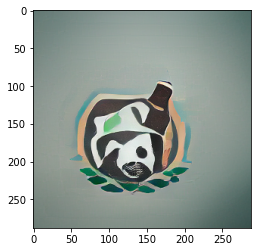

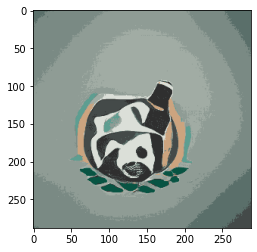

In [16]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
%matplotlib inline


img = cv.imread("media/panda logo.png")
plt.imshow(img[:,:,::-1])
plt.show()

Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 10
ret,label,center=cv.kmeans(Z,K,2,criteria,10,cv.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
plt.imshow(res2[:,:,::-1])

# K-Means is not great 

For generating logos k-means doesn't work well. I didn't see much besides k-means for color quantization from a quick google search so we'll roll our own algorithm directly.    


In [136]:
#https://scipython.com/blog/floyd-steinberg-dithering/

In [18]:
from PIL import Image



In [28]:
GREYSCALE = False
img_name = 'media/panda logo.png'

# Read in the image, convert to greyscale.
img = Image.open(img_name)
if GREYSCALE:
    img = img.convert('L')

width, height = img.size
new_width = 400
new_height = int(height * new_width / width)
img = img.resize((new_width, new_height), Image.ANTIALIAS)


C:\Users\minim\AppData\Local\Temp\ipykernel_25028\2602054477.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((new_width, new_height), Image.ANTIALIAS)


nc = 2


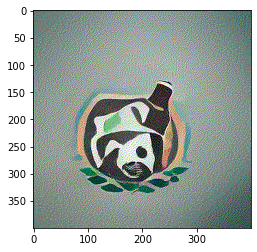

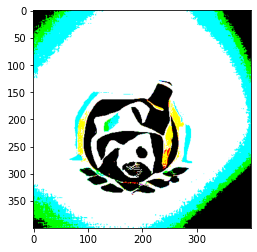

nc = 3


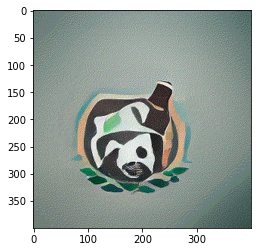

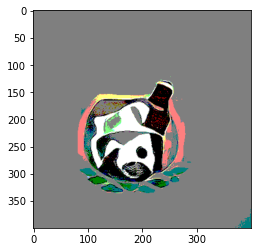

nc = 4


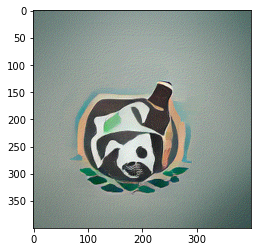

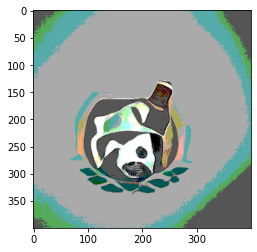

nc = 6


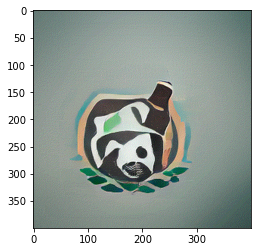

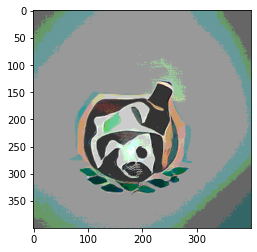

nc = 8


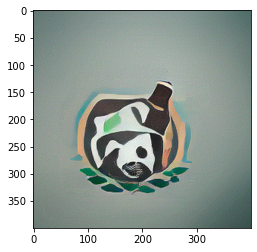

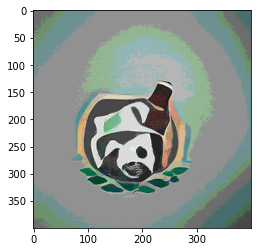

nc = 16


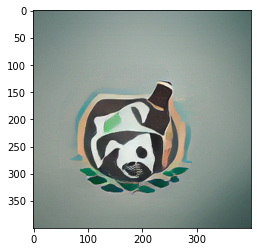

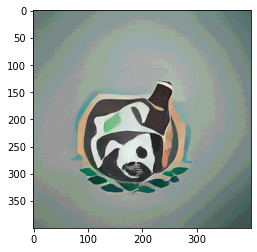

In [29]:

def get_new_val(old_val, nc):
    """
    Get the "closest" colour to old_val in the range [0,1] per channel divided
    into nc values.

    """

    return np.round(old_val * (nc - 1)) / (nc - 1)

# For RGB images, the following might give better colour-matching.
#p = np.linspace(0, 1, nc)
#p = np.array(list(product(p,p,p)))
#def get_new_val(old_val):
#    idx = np.argmin(np.sum((old_val[None,:] - p)**2, axis=1))
#    return p[idx]

def fs_dither(img, nc):
    """
    Floyd-Steinberg dither the image img into a palette with nc colours per
    channel.

    """

    arr = np.array(img, dtype=float) / 255

    for ir in range(new_height):
        for ic in range(new_width):
            # NB need to copy here for RGB arrays otherwise err will be (0,0,0)!
            old_val = arr[ir, ic].copy()
            new_val = get_new_val(old_val, nc)
            arr[ir, ic] = new_val
            err = old_val - new_val
            # In this simple example, we will just ignore the border pixels.
            if ic < new_width - 1:
                arr[ir, ic+1] += err * 7/16
            if ir < new_height - 1:
                if ic > 0:
                    arr[ir+1, ic-1] += err * 3/16
                arr[ir+1, ic] += err * 5/16
                if ic < new_width - 1:
                    arr[ir+1, ic+1] += err / 16

    carr = np.array(arr/np.max(arr, axis=(0,1)) * 255, dtype=np.uint8)
    return Image.fromarray(carr)

def palette_reduce(img, nc):
    """Simple palette reduction without dithering."""
    arr = np.array(img, dtype=float) / 255
    arr = get_new_val(arr, nc)

    carr = np.array(arr/np.max(arr) * 255, dtype=np.uint8)
    return Image.fromarray(carr)

for nc in (2, 3, 4, 6,8, 16):
    print('nc =', nc)
    dim = fs_dither(img, nc)
    plt.imshow(dim)
    plt.show()
    rim = palette_reduce(img, nc)
    plt.imshow(rim)
    plt.show()

In [30]:
#median cut https://muthu.co/reducing-the-number-of-colors-of-an-image-using-median-cut-algorithm/

#Neuquant https://github.com/kwinkunks/notebooks/blob/master/neuquant.py

In [31]:
#Then take that quantized one and reduce some of the background colors. 


# Straight-Line Distance Method

Below is a approach I came up with that I believe is considered the "straightline-method". Create color palette, assign colors by closeness to color, regenerate image. For a larger overview please read the [Color Quantization Wikipedia Page](https://en.wikipedia.org/wiki/Color_quantization)

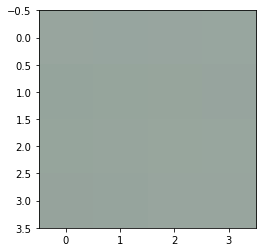

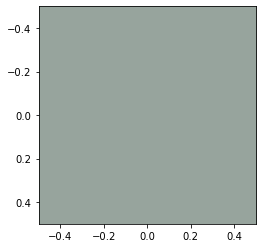

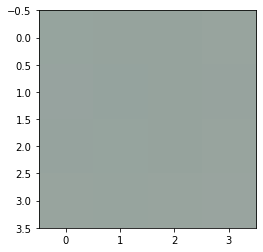

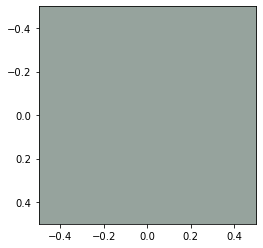

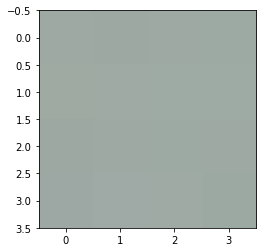

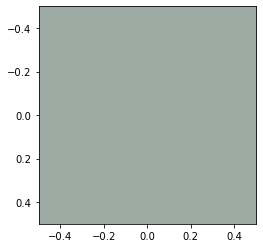

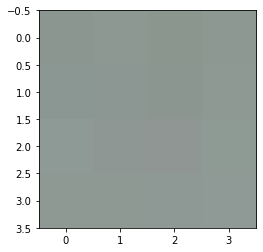

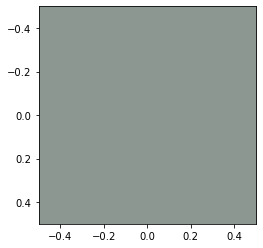

array([[151, 164, 157],
       [150, 163, 157],
       [157, 169, 163],
       [140, 151, 146]], dtype=uint8)

In [27]:
#Direct color quanitzation via the straightline method

#Rather than code your colors directly you can identify patches using the below code
slices=[
    #(y,x) -- we'll add a 2 pixel offset 
#     (55,90),
#     (120,60),J
#     (45,150),
#     (40,50),
#     (155, 50)
    
    (70, 78),
    (40,100),
    (60,105),
    (100,25),
]
colors=[]
for s in slices:
    patch=img[s[0]-2:s[0]+2,s[1]-2:s[1]+2,::-1]
    plt.imshow(patch)
    plt.show()
    colors.append(np.array(np.mean(np.mean(patch,axis=0),axis=0),"uint8"))
    plt.imshow([[colors[-1]]])
    plt.show()
    print("\n\n")
colors=np.array(colors)
colors

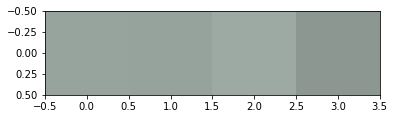

In [23]:
#here's our color palette
plt.imshow([colors])

In [24]:
colors

array([[151, 164, 157],
       [150, 163, 157],
       [157, 169, 163],
       [140, 151, 146]], dtype=uint8)

In [25]:
def distance(a,b):
    a=np.tile(a,(np.shape(b)[0],1)).astype("int16")
    b=b.astype("int16")
    l2=np.linalg.norm(a-b,axis=1)
    return l2

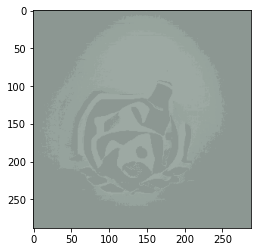

In [26]:
transformed_colors=img.copy()
X,Y,k=np.shape(transformed_colors)
for i in range(X):
    for j in range(Y):
        new_color_idx=np.argmin(distance(transformed_colors[i,j,:],colors))
        transformed_colors[i,j,:]=colors[new_color_idx]
plt.imshow(transformed_colors[:,:,:])